In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import os

In [0]:
pip install Distance

     |████████████████████████████████| 184kB 22.6MB/s 
  Created wheel for Distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=c727b2a3c180155e7ab4e9b0f618204441dfc6e028bdcfa2c5e95de8f5b7b0ea
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built Distance


In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import time
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from scipy.sparse import csr_matrix
import re
import string
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from collections import OrderedDict
from scipy.sparse import csr_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import distance
from sklearn.linear_model import SGDClassifier

In [0]:
import pickle

In [0]:
train_df = pickle.load(open(r"/content/drive/My Drive/Colab Notebooks/Statistical Computing/train_df.pkl", "rb"))
test_df = pickle.load(open(r"/content/drive/My Drive/Colab Notebooks/Statistical Computing/test_df.pkl", "rb"))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(binary=True).fit(train_df['seperated_ingredients'].values)
X_train_vectorized = vect.transform(train_df['seperated_ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')
Result_transformed = vect.transform(test_df['seperated_ingredients'].values)
Result_transformed = Result_transformed.astype('float')

In [0]:
vect

TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
print(X_train_vectorized.shape)

(39774, 2811)


In [0]:
print(Result_transformed.shape)

(9944, 2811)


In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_transformed = encoder.fit_transform(train_df.cuisine)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = 0)

In [0]:
# neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15588675654370570406
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3085447397830425429
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11480232300193670259
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14648777152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18064115586320486053
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
X_train.shape

(29830, 2811)

In [0]:
from keras.utils import to_categorical
from keras.optimizers import adam, SGD

from keras import regularizers

Neural Network 1

In [0]:
Y = keras.utils.to_categorical(y_train)
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(units= 20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, Y, epochs=100, batch_size=95, verbose=1, validation_split=0.2)

Train on 23864 samples, validate on 5966 samples
Epoch 1/100
23864/23864 [==============================] - 2s 88us/step - loss: 1.6447 - accuracy: 0.5075 - val_loss: 1.0674 - val_accuracy: 0.6740
Epoch 2/100
23864/23864 [==============================] - 2s 77us/step - loss: 1.0202 - accuracy: 0.6858 - val_loss: 0.9258 - val_accuracy: 0.7144
Epoch 3/100
23864/23864 [==============================] - 2s 73us/step - loss: 0.8391 - accuracy: 0.7465 - val_loss: 0.8579 - val_accuracy: 0.7497
Epoch 4/100
23864/23864 [==============================] - 2s 74us/step - loss: 0.7217 - accuracy: 0.7787 - val_loss: 0.8389 - val_accuracy: 0.7576
Epoch 5/100
23864/23864 [==============================] - 2s 77us/step - loss: 0.6445 - accuracy: 0.8036 - val_loss: 0.8383 - val_accuracy: 0.7630
Epoch 6/100
23864/23864 [==============================] - 2s 78us/step - loss: 0.5858 - accuracy: 0.8201 - val_loss: 0.8580 - val_accuracy: 0.7595
Epoch 7/100
23864/23864 [==============================] - 2s 7

In [0]:
y_predited = model.predict(Result_transformed)

In [0]:
y_predited[1]

array([7.4366884e-12, 1.9618581e-06, 6.0949972e-08, 2.0479821e-10,
       1.8131124e-12, 6.5351480e-05, 9.2008075e-16, 8.6840409e-13,
       1.7191951e-09, 1.0337920e-06, 1.6923535e-10, 2.0308743e-14,
       3.1906994e-23, 3.0642358e-09, 2.9450018e-14, 2.5532602e-14,
       9.9993157e-01, 3.5309705e-10, 9.9199998e-21, 5.5247844e-22],
      dtype=float32)

In [0]:
pred = list()
for i in range(len(y_predited)):
    pred.append(np.argmax(y_predited[i]))

In [0]:
y_predicted_final = encoder.inverse_transform(pred)

In [0]:
predictions = pd.DataFrame({'cuisine' : y_predicted_final , 'id' : test_df.id })
predictions = predictions[[ 'id', 'cuisine']]
predictions.to_csv('submit_mod_ANN.csv', index = False) # 0.77051

Neural Network 2

In [0]:
Y = keras.utils.to_categorical(y_train)
model1 = Sequential()
model1.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(units= 20, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history1 = model1.fit(X_train, Y, epochs=100, batch_size=100, verbose=1, validation_split=0.3)

Train on 20881 samples, validate on 8949 samples
Epoch 1/100
20881/20881 [==============================] - 3s 149us/step - loss: 1.8785 - accuracy: 0.4277 - val_loss: 1.3437 - val_accuracy: 0.5724
Epoch 2/100
20881/20881 [==============================] - 1s 63us/step - loss: 1.2308 - accuracy: 0.6194 - val_loss: 1.1005 - val_accuracy: 0.6548
Epoch 3/100
20881/20881 [==============================] - 1s 62us/step - loss: 1.0162 - accuracy: 0.6913 - val_loss: 0.9983 - val_accuracy: 0.6953
Epoch 4/100
20881/20881 [==============================] - 1s 61us/step - loss: 0.8828 - accuracy: 0.7298 - val_loss: 0.9468 - val_accuracy: 0.7238
Epoch 5/100
20881/20881 [==============================] - 1s 62us/step - loss: 0.7843 - accuracy: 0.7619 - val_loss: 0.9368 - val_accuracy: 0.7384
Epoch 6/100
20881/20881 [==============================] - 1s 63us/step - loss: 0.7128 - accuracy: 0.7811 - val_loss: 0.9307 - val_accuracy: 0.7380
Epoch 7/100
20881/20881 [==============================] - 1s 

In [0]:
y_predited_1 = model1.predict(Result_transformed)

In [0]:
pred = list()
for i in range(len(y_predited_1)):
    pred.append(np.argmax(y_predited_1[i]))

y_predicted_final_1 = encoder.inverse_transform(pred)

In [0]:
predictions = pd.DataFrame({'cuisine' : y_predicted_final_1 , 'id' : test_df.id })
predictions = predictions[[ 'id', 'cuisine']]
predictions.to_csv('submit_mod_ANN_1.csv', index = False) # 0.76528

Neural Network 3

In [0]:
Y = keras.utils.to_categorical(y_train)

Adam = adam(learning_rate=0.01, beta_1=0.95, beta_2=0.999, amsgrad=True)
model1 = Sequential()
model1.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dropout(0.7))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.6))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(units= 20, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history2 = model1.fit(X_train, Y, epochs=100, batch_size=100, verbose=1, validation_split=0.3)

Train on 20881 samples, validate on 8949 samples
Epoch 1/100
20881/20881 [==============================] - 2s 73us/step - loss: 1.9486 - accuracy: 0.4102 - val_loss: 1.5054 - val_accuracy: 0.5538
Epoch 2/100
20881/20881 [==============================] - 1s 62us/step - loss: 1.4047 - accuracy: 0.5698 - val_loss: 1.2308 - val_accuracy: 0.6299
Epoch 3/100
20881/20881 [==============================] - 1s 62us/step - loss: 1.2211 - accuracy: 0.6233 - val_loss: 1.0971 - val_accuracy: 0.6642
Epoch 4/100
20881/20881 [==============================] - 1s 62us/step - loss: 1.1144 - accuracy: 0.6583 - val_loss: 1.0406 - val_accuracy: 0.6854
Epoch 5/100
20881/20881 [==============================] - 1s 61us/step - loss: 1.0336 - accuracy: 0.6833 - val_loss: 1.0231 - val_accuracy: 0.6955
Epoch 6/100
20881/20881 [==============================] - 1s 62us/step - loss: 0.9937 - accuracy: 0.6954 - val_loss: 1.0350 - val_accuracy: 0.6916
Epoch 7/100
20881/20881 [==============================] - 1s 6

In [0]:
y_predited_2 = model1.predict(Result_transformed)

In [0]:
pred = list()
for i in range(len(y_predited_2)):
    pred.append(np.argmax(y_predited_2[i]))

y_predicted_final_2 = encoder.inverse_transform(pred)

In [0]:
predictions = pd.DataFrame({'cuisine' : y_predicted_final_2, 'id' : test_df.id })
predictions = predictions[[ 'id', 'cuisine']]
predictions.to_csv('submit_mod_ANN_2.csv', index = False) # 0.76448

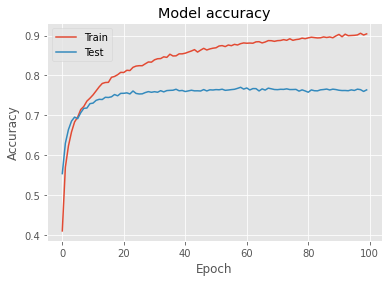

In [0]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

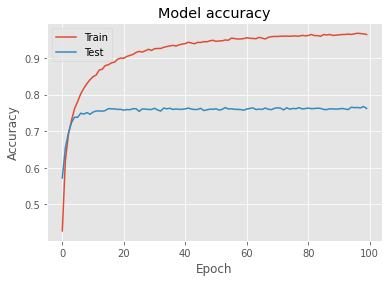

In [0]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

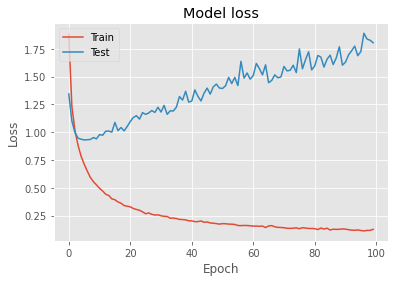

In [0]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

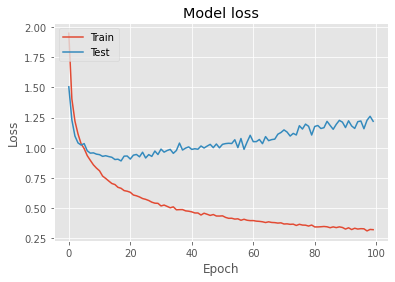

In [0]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Neural Network 4

In [0]:
Y = keras.utils.to_categorical(y_train)

Adam = adam(learning_rate=0.01, beta_1=0.95, beta_2=0.999, amsgrad=True)
model3 = Sequential()
model3.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model3.add(Dropout(0.7))
model3.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model3.add(Dropout(0.6))
model3.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model3.add(Dense(units= 20, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history3 = model3.fit(X_train, Y, epochs=100, batch_size=100, verbose=1, validation_split=0.3)

Train on 20881 samples, validate on 8949 samples
Epoch 1/100
20881/20881 [==============================] - 2s 86us/step - loss: 2.6834 - accuracy: 0.3873 - val_loss: 1.7792 - val_accuracy: 0.5554
Epoch 2/100
20881/20881 [==============================] - 1s 68us/step - loss: 1.7445 - accuracy: 0.5600 - val_loss: 1.5578 - val_accuracy: 0.6087
Epoch 3/100
20881/20881 [==============================] - 1s 67us/step - loss: 1.5677 - accuracy: 0.6157 - val_loss: 1.4488 - val_accuracy: 0.6576
Epoch 4/100
20881/20881 [==============================] - 1s 67us/step - loss: 1.4849 - accuracy: 0.6508 - val_loss: 1.4034 - val_accuracy: 0.6831
Epoch 5/100
20881/20881 [==============================] - 1s 67us/step - loss: 1.4408 - accuracy: 0.6724 - val_loss: 1.3965 - val_accuracy: 0.6853
Epoch 6/100
20881/20881 [==============================] - 1s 66us/step - loss: 1.4068 - accuracy: 0.6839 - val_loss: 1.3871 - val_accuracy: 0.6923
Epoch 7/100
20881/20881 [==============================] - 1s 6

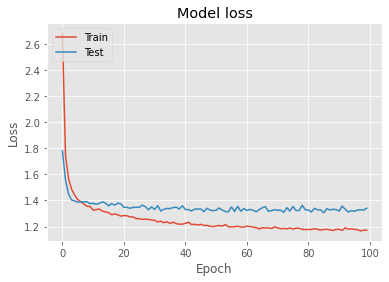

In [0]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_predited_3 = model3.predict(Result_transformed)

In [0]:
pred = list()
for i in range(len(y_predited_3)):
    pred.append(np.argmax(y_predited_3[i]))

y_predicted_final_3 = encoder.inverse_transform(pred)

In [0]:
predictions = pd.DataFrame({'cuisine' : y_predicted_final_3, 'id' : test_df.id })
predictions = predictions[[ 'id', 'cuisine']]
predictions.to_csv('submit_mod_ANN_3.csv', index = False) # 0.76076

Neural Network 5

In [0]:
Y = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

Adam = adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model4 = Sequential()
model4.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(1024, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(1024, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model4.add(Dense(units= 20, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history4 = model4.fit(X_train, Y, epochs=100, batch_size=100, verbose=1, validation_data=(X_test, Y_test))

Train on 29830 samples, validate on 9944 samples
Epoch 1/100
29830/29830 [==============================] - 4s 136us/step - loss: 2.3109 - accuracy: 0.4677 - val_loss: 1.5185 - val_accuracy: 0.6217
Epoch 2/100
29830/29830 [==============================] - 2s 69us/step - loss: 1.5197 - accuracy: 0.6313 - val_loss: 1.3718 - val_accuracy: 0.6911
Epoch 3/100
29830/29830 [==============================] - 2s 70us/step - loss: 1.4027 - accuracy: 0.6777 - val_loss: 1.3059 - val_accuracy: 0.7205
Epoch 4/100
29830/29830 [==============================] - 2s 69us/step - loss: 1.3488 - accuracy: 0.7060 - val_loss: 1.3019 - val_accuracy: 0.7248
Epoch 5/100
29830/29830 [==============================] - 2s 69us/step - loss: 1.3171 - accuracy: 0.7192 - val_loss: 1.2809 - val_accuracy: 0.7342
Epoch 6/100
29830/29830 [==============================] - 2s 68us/step - loss: 1.2924 - accuracy: 0.7282 - val_loss: 1.2860 - val_accuracy: 0.7424
Epoch 7/100
29830/29830 [==============================] - 2s 

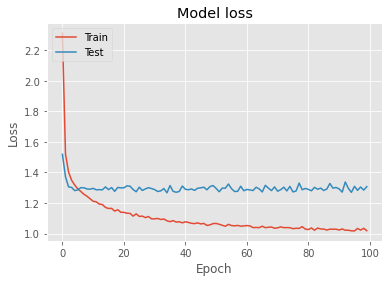

In [0]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_predited_4 = model4.predict(Result_transformed)

In [0]:
pred = list()
for i in range(len(y_predited_4)):
    pred.append(np.argmax(y_predited_4[i]))

y_predicted_final_4 = encoder.inverse_transform(pred)

In [0]:
predictions = pd.DataFrame({'cuisine' : y_predicted_final_4, 'id' : test_df.id})
predictions = predictions[[ 'id', 'cuisine']]
predictions.to_csv(r'/content/drive/My Drive/Colab Notebooks/Statistical Computing/submit_mod_ANN_4.csv', index = False) # 0.76981

Neural Networks with early stopping (6)

In [0]:
from keras.callbacks import EarlyStopping

monitor_early = EarlyStopping(monitor='val_loss', mode='min', patience=4, restore_best_weights=True)

Y = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

Adam = adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model5 = Sequential()
model5.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model5.add(Dropout(0.5))
model5.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model5.add(Dropout(0.5))
model5.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model5.add(Dropout(0.5))
model5.add(Dense(1024, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
model5.add(Dense(units= 20, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history5 = model5.fit(X_train, Y, epochs=100, batch_size=100, verbose=1, validation_data=(X_test, Y_test), callbacks = [monitor_early])

Train on 29830 samples, validate on 9944 samples
Epoch 1/100
29830/29830 [==============================] - 2s 73us/step - loss: 2.0922 - accuracy: 0.4971 - val_loss: 1.3890 - val_accuracy: 0.6658
Epoch 2/100
29830/29830 [==============================] - 2s 61us/step - loss: 1.3989 - accuracy: 0.6685 - val_loss: 1.2710 - val_accuracy: 0.7065
Epoch 3/100
29830/29830 [==============================] - 2s 59us/step - loss: 1.3010 - accuracy: 0.7079 - val_loss: 1.2082 - val_accuracy: 0.7422
Epoch 4/100
29830/29830 [==============================] - 2s 59us/step - loss: 1.2404 - accuracy: 0.7377 - val_loss: 1.1938 - val_accuracy: 0.7499
Epoch 5/100
29830/29830 [==============================] - 2s 59us/step - loss: 1.2017 - accuracy: 0.7528 - val_loss: 1.1769 - val_accuracy: 0.7626
Epoch 6/100
29830/29830 [==============================] - 2s 59us/step - loss: 1.1795 - accuracy: 0.7633 - val_loss: 1.2096 - val_accuracy: 0.7555
Epoch 7/100
29830/29830 [==============================] - 2s 5

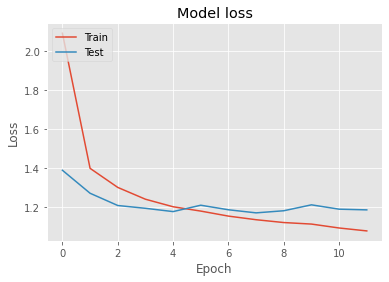

In [0]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_predited_5 = model5.predict(Result_transformed)
pred = list()
for i in range(len(y_predited_5)):
    pred.append(np.argmax(y_predited_5[i]))

y_predicted_final_5 = encoder.inverse_transform(pred)
predictions = pd.DataFrame({'cuisine' : y_predicted_final_5, 'id' : test_df.id})
predictions = predictions[[ 'id', 'cuisine']]
predictions.to_csv(r'/content/drive/My Drive/Colab Notebooks/Statistical Computing/submit_mod_ANN_5.csv', index = False) # 0.76518